## TASKS:

1. code Multi armed bandit
2. Look at PyMC Python Bayes

### Generate data
- for both A and B streams
- A will be our status quo
- B is the what we want to find out if it is worth putting into production


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline 

In [24]:
x_data_a = stats.bernoulli.rvs(p=.3, size=50)
x_data_b = stats.bernoulli.rvs(p=.5, size=50)
x_data_pipeline = stats.bernoulli.rvs(p=.5, size=50)

In [34]:
stats.beta.pdf(np.linspace(0,1,50), a = 1, b = 1)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

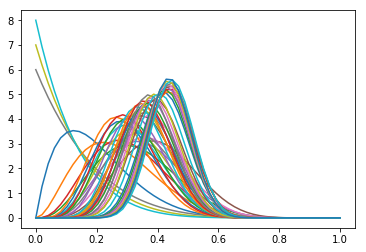

In [22]:
alpha = 0
beta = 0

new_beta_parameter_model = stats.beta.pdf(np.linspace(0,1,50), a = alpha, b = beta)
plt.plot(np.linspace(0,1,50), new_beta_parameter_model)

for a_val in x_data_a:
        alpha += a_val
        beta += (1-a_val)
        new_beta_parameter_model = stats.beta.pdf(np.linspace(0,1,50), a = alpha, b = beta)
        plt.plot(np.linspace(0,1,50), new_beta_parameter_model)
        

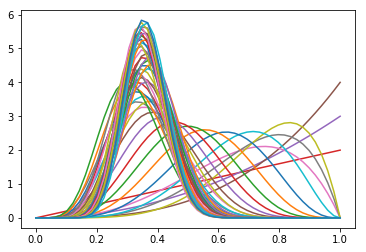

In [23]:
alpha = 0
beta = 0

new_beta_parameter_model = stats.beta.pdf(np.linspace(0,1,50), a = alpha, b = beta)
plt.plot(np.linspace(0,1,50), new_beta_parameter_model)

for val in x_data_b:
        alpha += val
        beta += (1-val)
        new_beta_parameter_model = stats.beta.pdf(np.linspace(0,1,50), a = alpha, b = beta)
        plt.plot(np.linspace(0,1,50), new_beta_parameter_model)


#### steps for core code
- pick the next item from the list
- pick which direction to send the user
    - sample from 

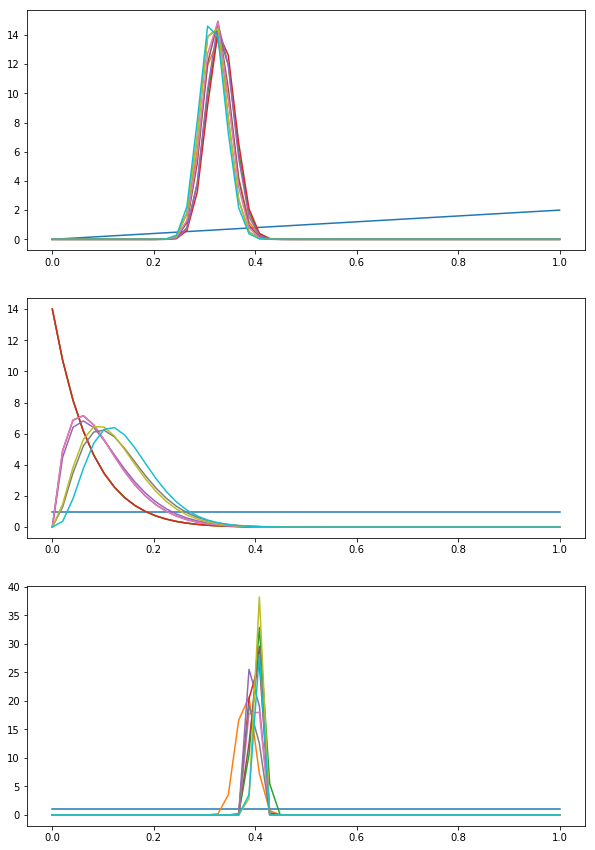

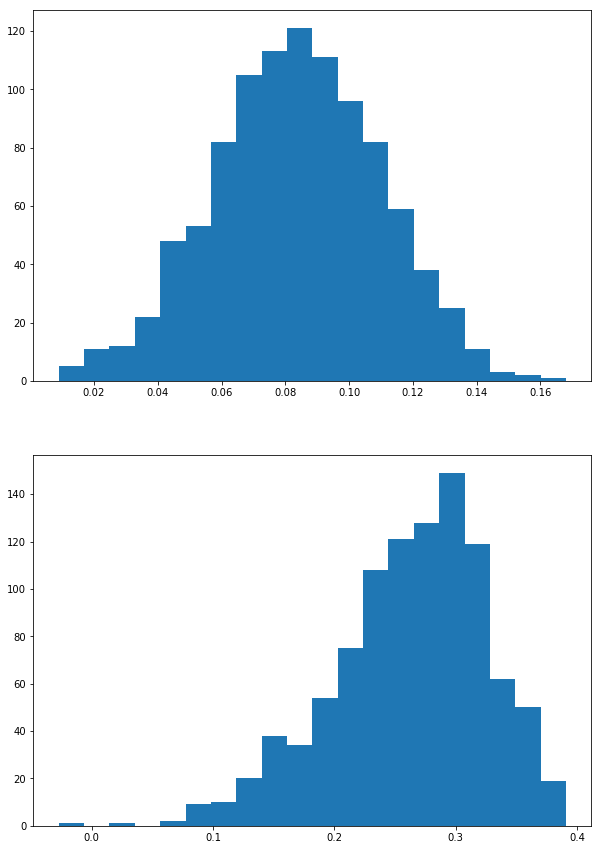

In [96]:
#initiat new features for testing
number_of_features = 3

a_feature = Feature_testing(convert_rate=.3, name="a_feature")
b_feature = Feature_testing(convert_rate=.2, name="b_feature")
c_feature = Feature_testing(convert_rate=.4, name="c_feature")

#simiulate n_user accessing feature, aka we will run the test for the next 100 users accessing the feature. 
n_users = 10000

#plot the features
fig2, ax2 = plt.subplots(number_of_features,1 , figsize=(10,15))
fig3, ax3 = plt.subplots(number_of_features -1, 1 ,figsize=(10,15))

for x in range(n_users):
    # pick which feature the user should access, but taking a random single sample from each beta distribution
    # and selecting the one with the highest value. 
    feature_winner = a_feature.which_class_to_direct_traffic(a_feature, b_feature, c_feature)
    feature_winner.convert_user()
    
    if x%1000==0:
        _=ax2[0].plot(np.linspace(0,1,50), stats.beta.pdf(np.linspace(0,1,50), \
                                                          a = a_feature.feature_alpha, b = a_feature.feature_beta))
        _=ax2[1].plot(np.linspace(0,1,50), stats.beta.pdf(np.linspace(0,1,50), \
                                                          a = b_feature.feature_alpha, b = b_feature.feature_beta))
        _=ax2[2].plot(np.linspace(0,1,50), stats.beta.pdf(np.linspace(0,1,50), \
                                                          a = c_feature.feature_alpha, b = c_feature.feature_beta))

graph_num = 0        
pairs_ordered = a_feature.get_pairs_to_compare(a_feature, b_feature, c_feature)
for pair in pairs_ordered:
    new_dist = stats.beta.rvs(a=pair[0].feature_alpha, b=pair[0].feature_beta, size=1000) - \
                stats.beta.rvs(a=pair[1].feature_alpha, b=pair[1].feature_beta, size=1000)

        
    ax3[graph_num].hist(new_dist, bins=20)
    graph_num +=1
    

In [90]:
class Feature_testing ():
    def __init__(self, convert_rate, name, alpha_start=1, beta_start=1, param_model_size = 50):
        self.conversion_rate = convert_rate
        self.feature_alpha = alpha_start
        self.feature_beta = beta_start
        self.param_model_size = param_model_size
        self.random_val = 0
        self.did_user_convert=0
        self.name = name
    
    def generate_random_val(self):
        self.random_val = stats.beta.rvs(a=self.feature_alpha, b=self.feature_beta, size=1)[0]
        return(self.random_val)
    
    def convert_user(self):
        # simulate conversion by asking bernoulli if the user will convert based on conversion_rate
        self.did_user_convert = stats.bernoulli.rvs(p = self.conversion_rate)
        self.update_param_model()
        
    def update_param_model(self):
        self.feature_alpha += self.did_user_convert
        self.feature_beta += (1- self.did_user_convert)
        
        
    def which_class_to_direct_traffic(self, *args):
        """
        helper function that takes 2 or more objects and compares them to see which one drew largest random val.
        """
        temp_list = []
        for arg in args:
            arg.generate_random_val()
            temp_list.append(arg.random_val)

        position = np.argmax(temp_list)
        return(args[position])

    def get_pairs_to_compare(self, *args):
        '''
        this will return a list containing pairs that will be plotted against each other to determine
        what stopping criteria to use that might feed a method to stop the process when satisfied. 
        '''
        temp_list = []
        for arg in args:
            temp_list.append(stats.beta(a=arg.feature_alpha, b=arg.feature_beta).mean())
            
        feature_order_low_to_high = np.argsort(temp_list)
                
        compare_pairs = []
        for cnt in range(2,len(feature_order_low_to_high) + 1):
            compare_pairs.append([args[feature_order_low_to_high[-1]], args[feature_order_low_to_high[-cnt]]])
        return(compare_pairs)
            

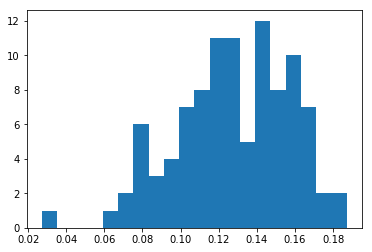

In [93]:
# probability of C - A
new_dist = stats.beta.rvs(a=c_feature.feature_alpha, b=c_feature.feature_beta, size=100) - \
                stats.beta.rvs(a=a_feature.feature_alpha, b=a_feature.feature_beta, size=100)

_=plt.hist(new_dist, bins=20)

In [94]:
print(stats.beta(a=c_feature.feature_alpha, b=c_feature.feature_beta).mean())
print(stats.beta(a=a_feature.feature_alpha, b=a_feature.feature_beta).mean())

0.393889686283
0.27027027027


In [72]:
print(stats.beta(a=c_feature.feature_alpha, b=c_feature.feature_beta).mean())
print(stats.beta(a=b_feature.feature_alpha, b=b_feature.feature_beta).mean())
print(stats.beta(a=a_feature.feature_alpha, b=a_feature.feature_beta).mean())


0.401153212521
0.206349206349
0.30303030303


In [57]:
b = [['a', 4],['b', 3], ['c', 1]]
c = [4, 3, 2]
d = np.argsort(c)
print(d[-1], d[-2], d[-3])

0 1 2


In [79]:
print(len(d))
print(range(2, len(d)+1))
for i in range(2, len(d) +1):
    print(i)

3
range(2, 4)
2
3


1. difference between hypothesis testing vs. bayes stopping criteria.
2. oop
3. multi-arm bandit
4. visualization
5. stopping rule + 1 